# Linear Regression

- y=a+bx+b1 x1 + b2 x2....
- y => Dependent/target(1)[1D]
- x => independent/features(n)[2D]

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
time=np.array([5,7,12,16,20]).reshape(-1,1)

In [4]:
mass=np.array([40,120,180,210,240])

In [5]:
mymodel=LinearRegression()
mymodel.fit(time ,mass)

LinearRegression()

In [9]:
x=int(input("Enter the time in minute"))
result=mymodel.predict([[x]])
print("if the time is ",x,"minutes the mass is ",result[0], "grams")

Enter the time in minute 25


if the time is  25 minutes the mass is  316.7012987012987 grams


In [10]:
mass_model=mymodel.predict(time)
print(mass_model)

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


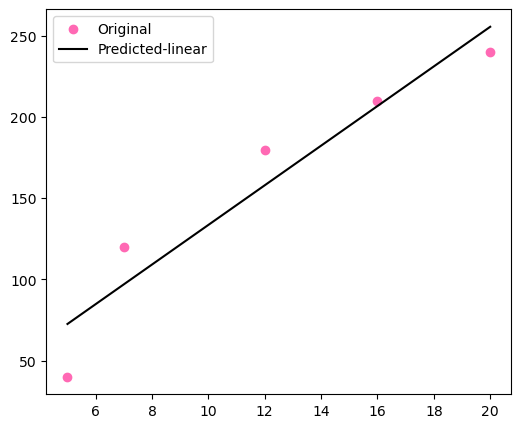

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.scatter(time,mass,label = 'Original',color='hotpink')
plt.plot(time,mass_model,label='Predicted-linear',color='k')
plt.legend()
plt.show()

Evaluation

R-Square

- Lower,the better

In [14]:
r2score=r2_score(time,mass_model)
print(r2score)

-816.6925282509699


MSE
- Lower the better

In [15]:
mse=mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


MAE
- Lower the better

In [17]:
mae=mean_absolute_error(time,mass_model)
print(mae)

146.0


Linear Regression on large data

Case: Predicting the salary from age,experiance,gender,education

1. Importing libraries
2. Load data
3. Split data
4. Create and train model
5. Test the model
6. Evaluation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
x=pd.read_csv(r"C:\Users\DELL\Downloads\Salary_EDA.csv")
x.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


Clean data

In [33]:
x.isnull().sum()

Age                    2
Gender                 4
Education Level        3
Job Title              5
Years of Experience    2
Salary                 3
Gender_e               0
Education_e            0
dtype: int64

In [34]:
x.dropna(inplace=True)
x.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Gender_e               0
Education_e            0
dtype: int64

Data preprocessing

In [27]:
g_e=LabelEncoder()
x['Gender_e']=g_e.fit_transform(x['Gender'])
x['Education_e']=g_e.fit_transform(x['Education Level'])
x.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_e,Education_e
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


Split_ind, dep

In [29]:
X=x[['Gender_e','Education_e','Years of Experience']]
Y=x['Salary']

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2,random_state=42)

Create and Train

In [35]:
sal_model=LinearRegression()
sal_model.fit(X_train,Y_train)

LinearRegression()